,ID,Sexe,MCV,MCHC,MCH,Ret_Hb,RDW_CV,Ferritine,Statut_AIS
0,16012417517,M,84.3,35.8,30.2,34.7,12.3,97.21,AIS Excluded
1,16012417518,F,83.8,33.4,28.0,32.3,13.4,184.20,AIS Excluded
2,16012417519,F,85.8,36.0,30.9,34.9,12.1,220.80,AIS Excluded
3,16012417521,M,85.6,35.7,30.6,35.1,12.9,336.00,AIS Excluded
4,16012417522,M,85.8,33.0,28.3,32.5,13.2,53.75,AIS Excluded
5,16012417524,M,83.9,32.4,27.2,31.9,12.5,41.55,AIS Excluded
6,16012417528,M,85.1,34.7,29.5,34.5,12.9,68.75,AIS Excluded
7,16012417529,M,85.6,35.5,30.4,35.2,12.3,45.42,AIS Excluded
8,16012417530,M,80.2,34.7,27.8,31.9,11.9,145.00,AIS Excluded
9,16012417531,M,81.8,36.5,29.9,33.8,12.9,230.70,AIS Excluded


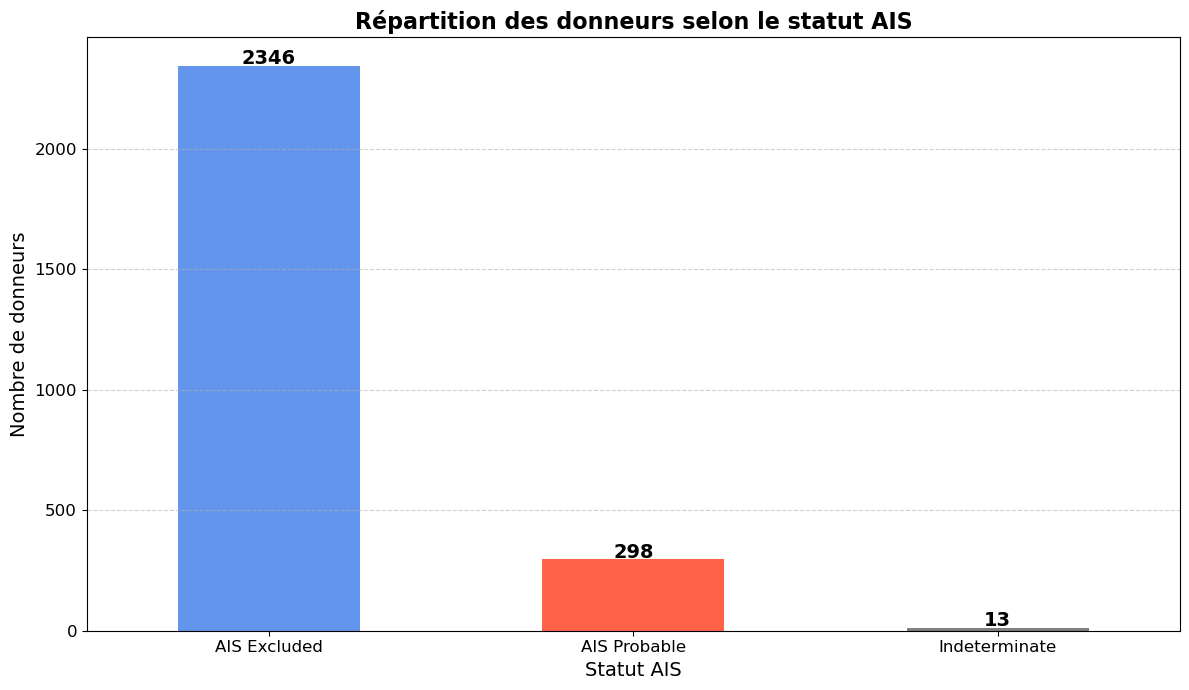

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Charger le fichier Excel et la feuille RET+FERR
file_path = "Tout.xlsx"
df = pd.read_excel(file_path, sheet_name="RET+FERR")

# Nettoyage des données
df_cleaned = df.iloc[1:].reset_index(drop=True)
df_cleaned.columns = [
    "ID", "Sexe", "RBC", "HGB", "HCT", "MCV", "MCHC", "MCH", "Ferritine",
    "Carence_Martiale", "Absence_Iron_Stocks", "Low_Iron_Stocks", "Anemie",
    "Ret_Hb", "Statut_Don", "RDW_SD", "RDW_CV", "IRF", "HFR"
]
df_cleaned = df_cleaned[["ID", "Sexe", "MCV", "MCHC", "MCH", "Ret_Hb", "RDW_CV", "Ferritine"]]

# Convertir en valeurs numériques
df_cleaned[["MCV", "MCHC", "MCH", "Ret_Hb", "RDW_CV", "Ferritine"]] = df_cleaned[["MCV", "MCHC", "MCH", "Ret_Hb", "RDW_CV", "Ferritine"]].apply(pd.to_numeric, errors='coerce')
df_cleaned = df_cleaned.dropna().reset_index(drop=True)

# Appliquer le nouvel algorithme ID
def detect_id(rdw_cv, mch, mchc):
    if (rdw_cv < 12.85) or (rdw_cv > 12.85 and mch > 28.45 and mchc > 33.25):
        return "ID Excluded (Sensitivity 80,1% - Specificity 63,2%)"
    elif (rdw_cv > 12.85 and mch < 28.45) or (rdw_cv > 12.85 and mch > 28.55 and mchc < 33.25):
        return "ID Probable (Sensitivity 63,2% - Specificity 80,1%)"
    else:
        return "Indeterminate"

df_cleaned["Statut_ID"] = df_cleaned.apply(lambda row: detect_id(row["RDW_CV"], row["MCH"], row["MCHC"]), axis=1)

# Afficher les données nettoyées
display(df_cleaned.head(20))  
df_cleaned.to_excel("resultats_ID.xlsx", index=False)

# Graphique amélioré : Répartition des donneurs par statut ID
distribution_id = df_cleaned["Statut_ID"].value_counts()
plt.figure(figsize=(12, 7))
bars = distribution_id.plot(kind='bar', color=['cornflowerblue', 'tomato', 'gray'])
plt.title("Répartition des donneurs selon le statut ID", fontsize=16, fontweight='bold')
plt.ylabel("Nombre de donneurs", fontsize=14)
plt.xlabel("Statut ID", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Ajouter des valeurs sur les barres
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, str(int(bar.get_height())), ha='center', fontsize=14, fontweight='bold', color='black')

plt.tight_layout()
plt.show()